**Cerdit card fraud detection**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

- Loading data

In [58]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [59]:
data.shape

(180351, 31)

In [60]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,180351.000000,180351.000000,180351.000000,180351.000000,180351.000000,180351.000000,180351.000000,180351.000000,180351.000000,180350.000000,...,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000,180350.000000
mean,64311.566190,-0.145331,0.025240,0.430058,0.099535,-0.154862,0.054170,-0.071213,0.026522,0.015512,...,-0.022623,-0.070349,-0.020086,0.007205,0.080848,0.010398,0.002049,0.002168,88.248748,0.002018
std,30347.247811,1.871304,1.614101,1.411181,1.381971,1.352537,1.302884,1.212845,1.226281,1.145966,...,0.743755,0.676677,0.595308,0.600710,0.474494,0.489683,0.392520,0.307691,246.997674,0.044880
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,42203.000000,-0.977400,-0.557176,-0.153895,-0.765620,-0.813617,-0.697945,-0.583844,-0.169208,-0.660590,...,-0.229104,-0.543503,-0.169513,-0.335673,-0.213247,-0.330643,-0.065823,-0.033913,5.680000,0.000000
50%,62895.000000,-0.147139,0.096708,0.580202,0.103124,-0.207890,-0.208333,-0.025300,0.051259,-0.077049,...,-0.050295,-0.055240,-0.033385,0.057135,0.124796,-0.059405,0.007672,0.020196,22.220000,0.000000
75%,81175.500000,1.194524,0.793880,1.272423,0.918396,0.406179,0.446929,0.474826,0.345506,0.635238,...,0.136487,0.385012,0.104860,0.418056,0.394112,0.269162,0.089462,0.078156,78.000000,0.000000
max,124501.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


- Separate into Fraud and Valid transaction

In [61]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases:', len(fraud))
print('Valid Transactions:',len(valid))

0.0020223795184069874
Fraud Cases: 364
Valid Transactions: 179986


In [62]:
fraud.Amount.describe()

count     364.000000
mean      116.743462
std       249.586886
min         0.000000
25%         1.000000
50%        11.395000
75%       104.030000
max      2125.870000
Name: Amount, dtype: float64

- Correlation heatmap

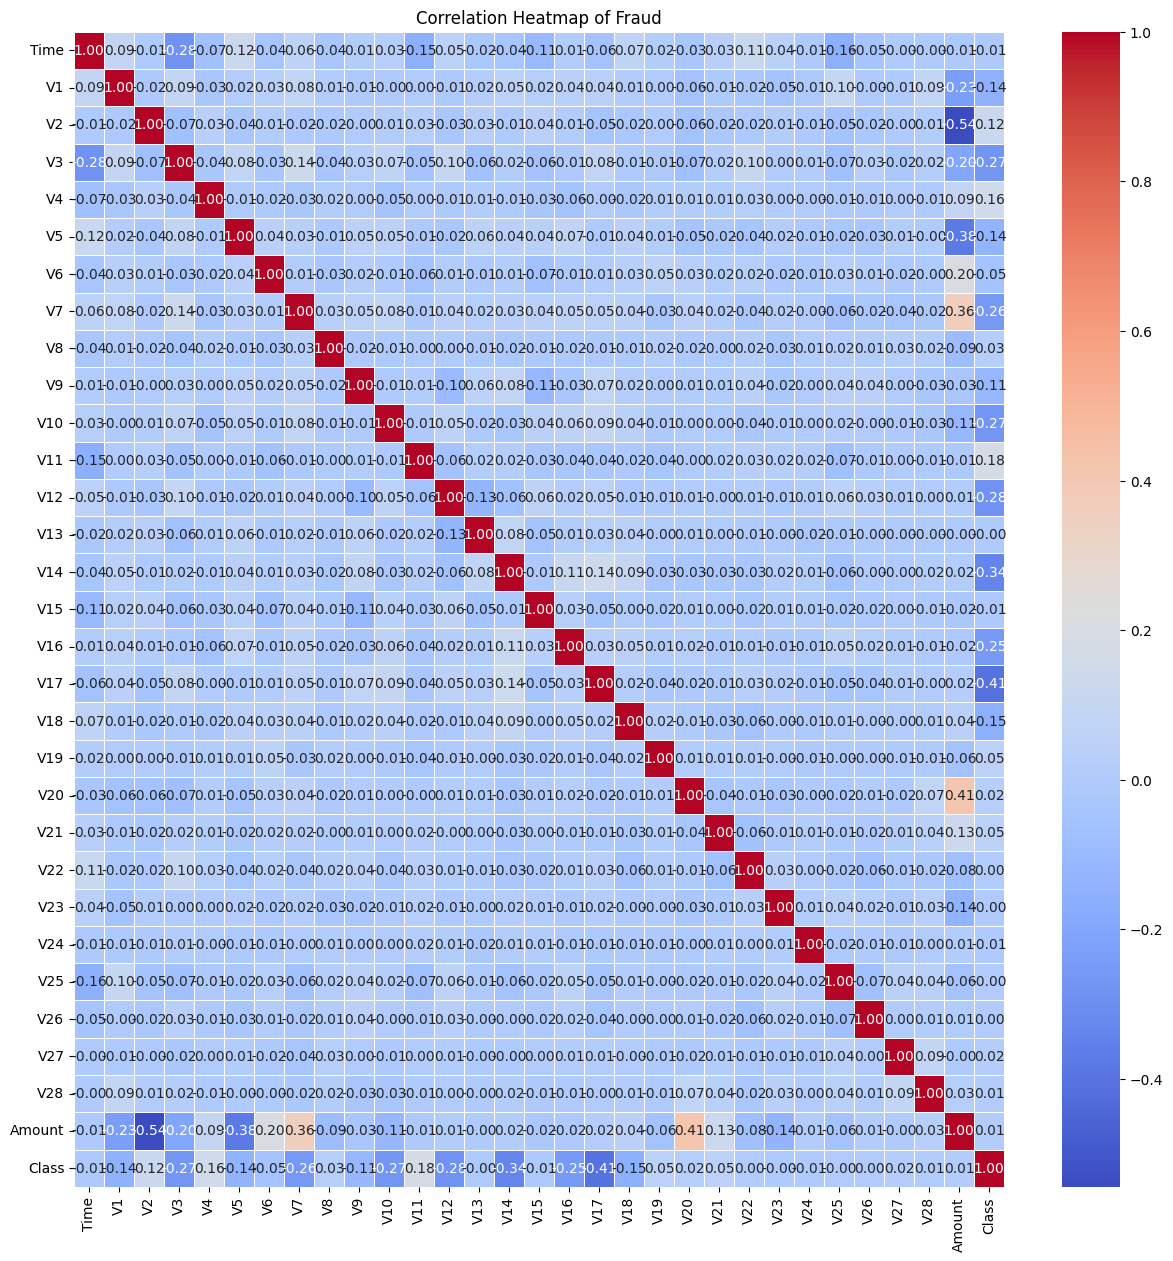

In [63]:
#  Correlation heatmap
plt.figure(figsize=(15, 15))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Fraud')
plt.show()

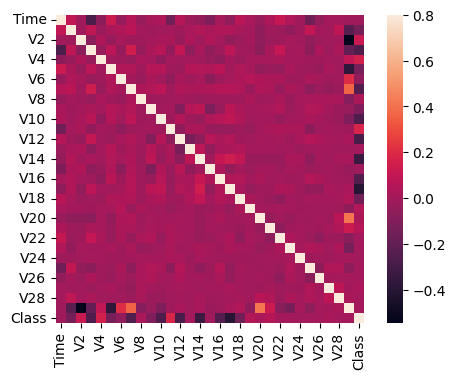

In [64]:
corr=data.corr()
fig=plt.figure(figsize=(6,4))
sns.heatmap(corr,vmax=.8,square=True)
plt.show()

- Removing the duplicated values and NaNs values

In [65]:
data.duplicated().any()

True

In [66]:
data= data.drop_duplicates()
data = data.dropna()

In [67]:
data.shape

(179679, 31)

- y is vector of Class
- X is the matrix contains remaining columns

In [68]:
X = data.drop('Class', axis=1)
y = data['Class']

- SMOTE sampling(Synthetic Minority Oversampling Technique) use in making the imbalance sampling in balance way.


In [69]:
# Apply SMOTE to the training data
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [46]:
rf= RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- Making Predictions

In [71]:
y_pred = rf.predict(X_test)
#len(y_pred)

- Accuarcy and Classification report

In [72]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print("Classification report:\n",classification_report(y_test, y_pred))

Accuracy: 0.99990241726378
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     36039
         1.0       1.00      1.00      1.00     35695

    accuracy                           1.00     71734
   macro avg       1.00      1.00      1.00     71734
weighted avg       1.00      1.00      1.00     71734



In [73]:
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

- Receiver Operating Characteristic - Area Under the Curve score

In [74]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob_rf)
print('ROC AUC Score:', roc_auc)

ROC AUC Score: 0.9999982074173657


In [75]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

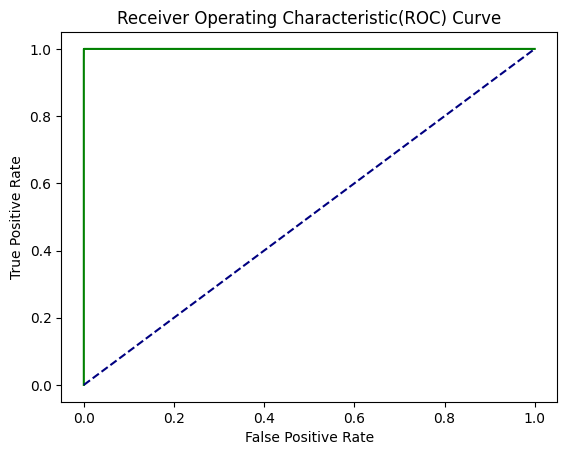

In [76]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.show()